In [2]:
import zipfile
import os

# Define the path to the uploaded zip file
uploaded_zip_path = r"C:\Users\Sreeja Mondal\Downloads\archive (8).zip"

# Define the directory where you want to extract the files
extract_dir = 'cats_dogs_dataset'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the zip file
with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

# List a few extracted files to verify
extracted_files = os.listdir(extract_dir)
print(f'Number of files extracted: {len(extracted_files)}')
print(f'First 10 files: {extracted_files[:10]}')


Files extracted to cats_dogs_dataset
Number of files extracted: 1
First 10 files: ['dogscats']


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
#As there are large amount of data and working with them will take a lot of RAM so Keras gives a function called GENERATORS which divides the data into batches and helps us to train them 

# Directory paths
train_dir = 'cats_dogs_dataset/dogscats/sample/train'
valid_dir = 'cats_dogs_dataset/dogscats/valid'

# Create image data generators
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=valid_dir,
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Display dataset information
print(f'Training dataset: {train_ds}')
print(f'Validation dataset: {test_ds}')


Found 16 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Training dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Found 23000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


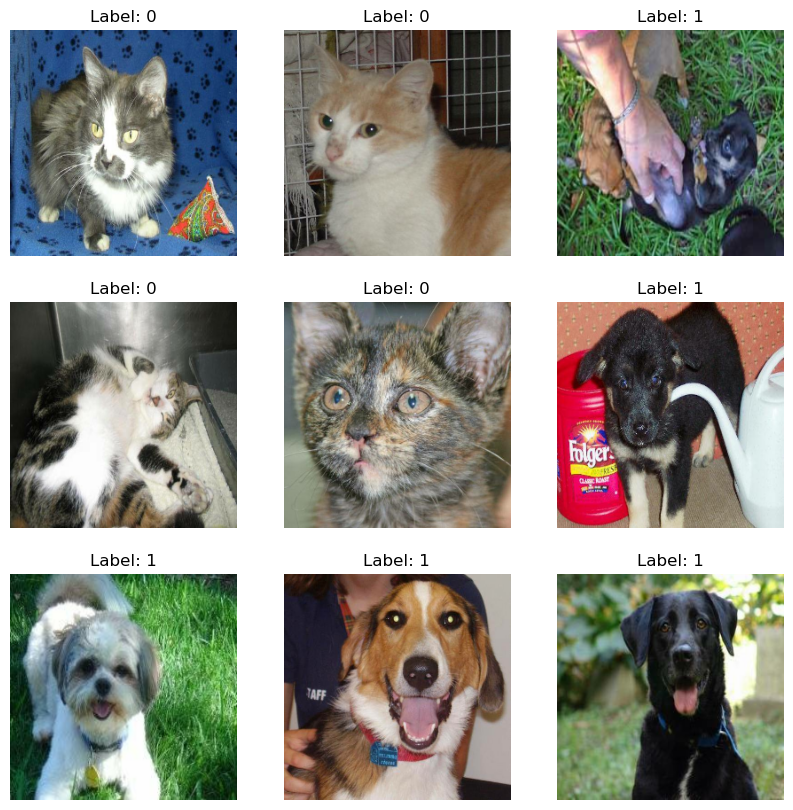

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)
Labels: [1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1]


In [5]:

import matplotlib.pyplot as plt

# Directory paths
train_dir = 'cats_dogs_dataset/dogscats/train'  # Adjust this path
valid_dir = 'cats_dogs_dataset/dogscats/valid'  # Adjust this path

# Create image data generators
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=valid_dir,
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply normalization to the datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Function to display a batch of images with their labels
def display_batch_of_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(f'Label: {int(labels[i])}')
            plt.axis("off")
    plt.show()

# Display images from the training dataset
display_batch_of_images(train_ds)

# Function to print dataset information
def print_dataset_info(dataset):
    for images, labels in dataset.take(1):
        print(f'Image batch shape: {images.shape}')
        print(f'Label batch shape: {labels.shape}')
        print(f'Labels: {labels.numpy()}')

# Print training dataset information
print_dataset_info(train_ds)


# Create CNN Model

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
719/719 [==============================] - 3079s 4s/step - loss: 1.5369 - accuracy: 0.5830 - val_loss: 0.6289 - val_accuracy: 0.6255
Epoch 2/10
719/719 [==============================] - 32767s 46s/step - loss: 0.6056 - accuracy: 0.6579 - val_loss: 0.5540 - val_accuracy: 0.6990
Epoch 3/10
719/719 [==============================] - 8181s 11s/step - loss: 0.5158 - accuracy: 0.7357 - val_loss: 0.8045 - val_accuracy: 0.6335
Epoch 4/10
719/719 [==============================] - 3341s 5s/step - loss: 0.4608 - accuracy: 0.7649 - val_loss: 0.5166 - val_accuracy: 0.7590
Epoch 5/10
719/719 [==============================] - 3532s 5s/step - loss: 0.4065 - accuracy: 0.7899 - val_loss: 0.5278 - val_accuracy: 0.7225
Epoch 6/10
719/719 [==============================] - 19411s 27s/step - loss: 0.3615 - accuracy: 0.8108 - val_loss: 0.4750 - val_accuracy: 0.7420
Epoch 7/10
141/719 [====>.........................] - ETA: 33:10 - loss: 0.3262 - accuracy: 0.8214

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


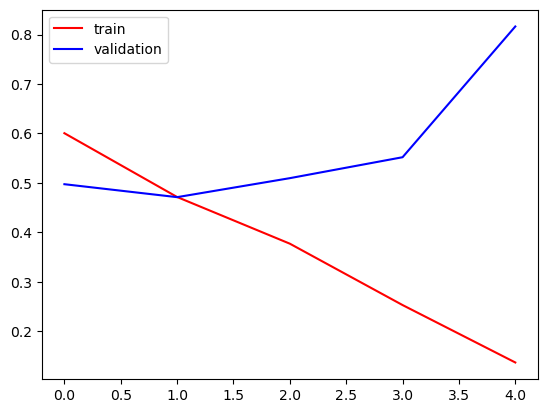

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
